# Titanic

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://dermot.dbsdataprojects.com/wp-content/uploads/sites/164/2017/01/titanic-A-1200x615.jpg")

### Import Libraries

In [2]:
# Importing pandas and Series + DataFrame:
import pandas as pd
from pandas import Series, DataFrame

# Importing numpy, matplotlib and seaborn:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Setting up Titanic csv files as a DataFrame

In [3]:
titanic_train_df = pd.read_csv('titanic_train.csv')

In [4]:
titanic_test_df = pd.read_csv('titanic_test.csv')

### Visualising Data - Exploratory Data Analysis (EDA)

In [5]:
# A short preview of our data from Titanic file:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# See overal info about the dataset
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


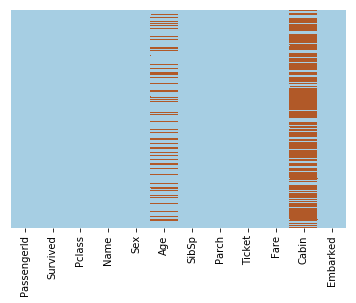

In [7]:
# Heatmap for visualising missing data:
sns.heatmap(titanic_train_df.isnull(), yticklabels = False, cbar = False, cmap = 'Paired')

We have some information missing in the following features: age, cabin and embarked. We will drop features we don't need and do some data cleansing where necessary. 

##### Who were passenges on the Titanic?

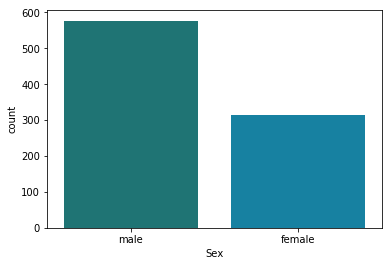

In [8]:
# Bar chart of total male and female passengers on the board:
sns.countplot(x = 'Sex', data=titanic_train_df,  palette = 'winter_d')

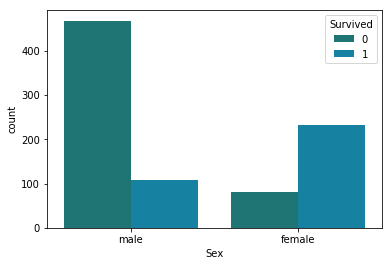

In [9]:
# Bar chart of male and female, split into survived/not survived:
sns.countplot(x = 'Sex', hue = 'Survived', data=titanic_train_df, palette = 'winter_d')

In [10]:
# Adding a new column 'Person' that includes a category child for people under the age of 16:
def male_female_child(passenger):
    Age, Sex = passenger
    
    if Age < 16:
        return 'child'
    else :
        return Sex

In [11]:
titanic_train_df['Person'] = titanic_train_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

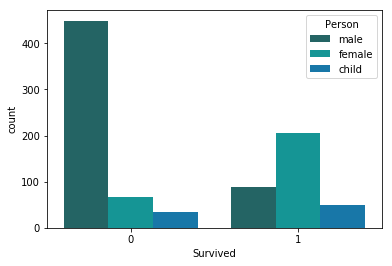

In [12]:
# Bar chart of male and female, split into survived/not survived:
sns.countplot(x = 'Survived', hue = 'Person', data=titanic_train_df, palette = 'winter_d')

We can see a patternt that person who survived was more likely to be a female or the child under 16 than a male. 

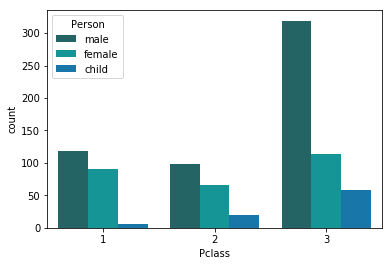

In [13]:
# Distribution of males, females and under 16s according to travel class:
sns.countplot(x = 'Pclass', data=titanic_train_df, hue = 'Person', palette ='winter_d')

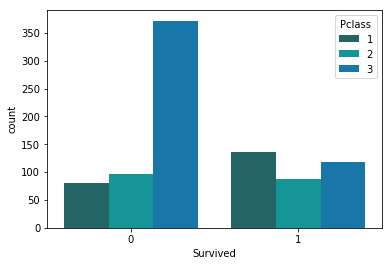

In [14]:
# Distribution of survival according to travel class:
sns.countplot(x = 'Survived', data=titanic_train_df, hue='Pclass', palette = 'winter_d')

From the countplots above, we can see that the higher chance of survival had passengers travelling in first class. The least likely to survive were passengers travelling in third class. 

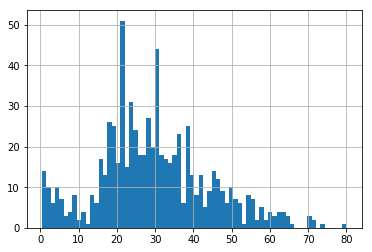

In [15]:
# Distribution of ages:
titanic_train_df['Age'].dropna().hist(bins=70)

In [16]:
# Returns the average age of Titanic passenger:
mean = titanic_train_df['Age'].mean()
print('The average age of a passenger on Titanic was: ', mean)

The average age of a passenger on Titanic was:  29.69911764705882


In [17]:
# Returns counts of 'Person' categories: 
titanic_train_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

Most of the 83 children (under 16) on the board are under 10. From histogram, the average age of passengers is somewhere between 20 and 30.

Working out mean age gives us an accurate value of average age which is 29 years. 

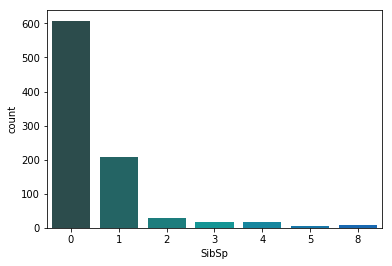

In [18]:
# Did the passenger have a spouse or a sibling on the board?
sns.countplot(x = 'SibSp', data=titanic_train_df, palette = 'winter_d')

Most popular option is 0 which means that the passenger didn't have a family on Titanic. We can assume that 1 means travelling with spouse in most of the cases rather than single parent and a child. 

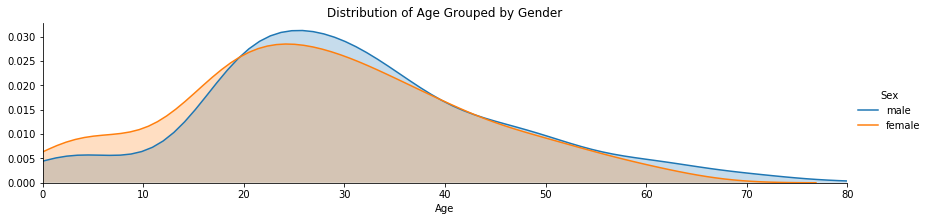

In [19]:
# Distribution of ages grouped by gender
fig = sns.FacetGrid(titanic_train_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_train_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

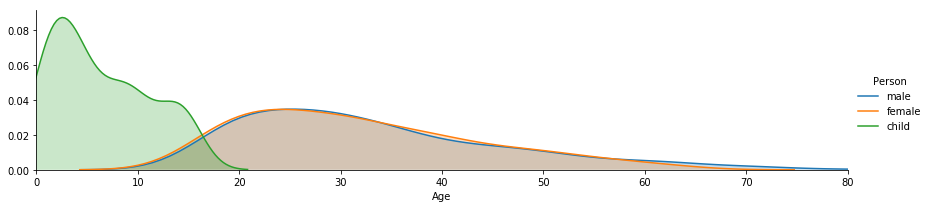

In [20]:
fig = sns.FacetGrid(titanic_train_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_train_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

 The plot above shows age distribution for the children and the rest of the males and females. 
 Since kdeplot is used the age of the children over 16 is just a bandwith.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


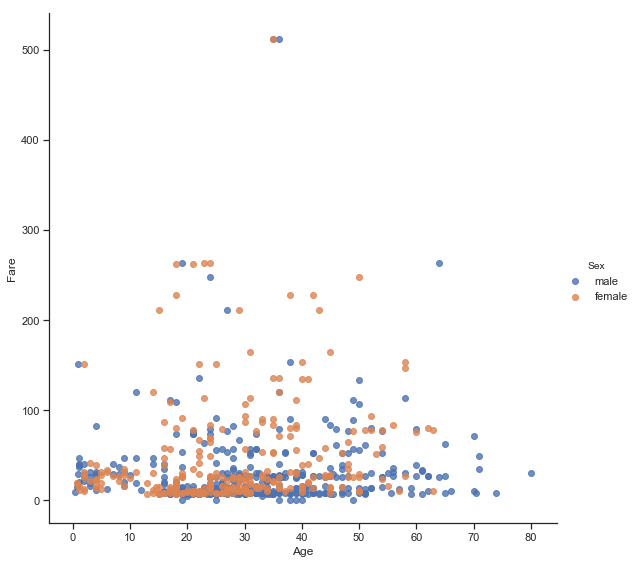

In [21]:
# Scatter plot of Age vs Fare colored by Sex:
sns.set(style="ticks")
sns.lmplot("Age", "Fare", data=titanic_train_df, hue='Sex', fit_reg=False, size = 8)

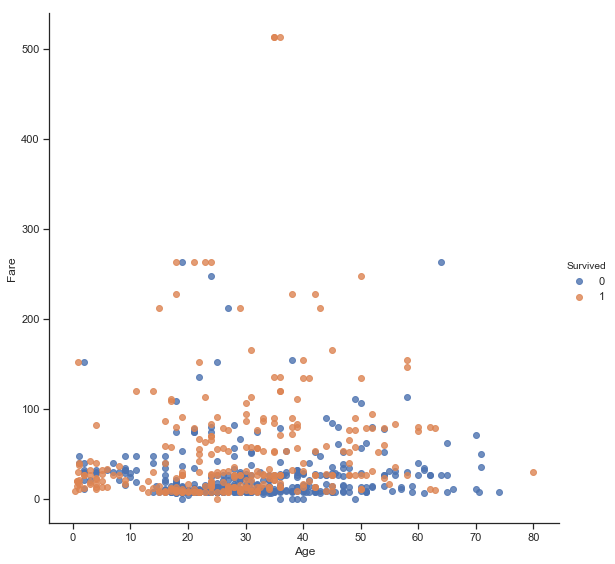

In [22]:
# Scatter plot of Age vs Fare colored by survival:
sns.set(style="ticks")
sns.lmplot("Age", "Fare", data=titanic_train_df, hue='Survived', fit_reg=False, size = 8)

##### What cabins did the passengers stay in?

In [23]:
# Deck is the NaN values of 'Cabin' entry:
deck = titanic_train_df['Cabin'].dropna()

In [24]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


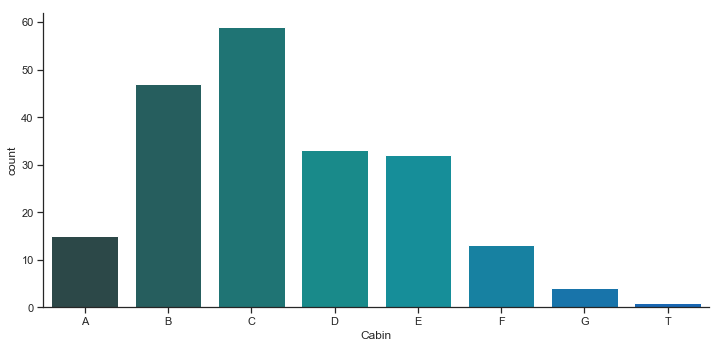

In [25]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G','T'],
               aspect=2, palette='winter_d')

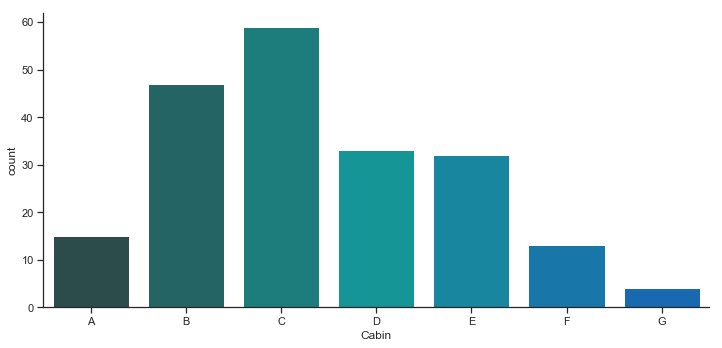

In [26]:
# Drop the 'T' cabin:

cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G'],
               aspect=2, palette='winter_d')

In [27]:
# Set a new feature - Deck
titanic_train_df["Deck"]=titanic_train_df.Cabin.str[0]
titanic_train_df["Deck"].unique() # 0 is for null value

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [28]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


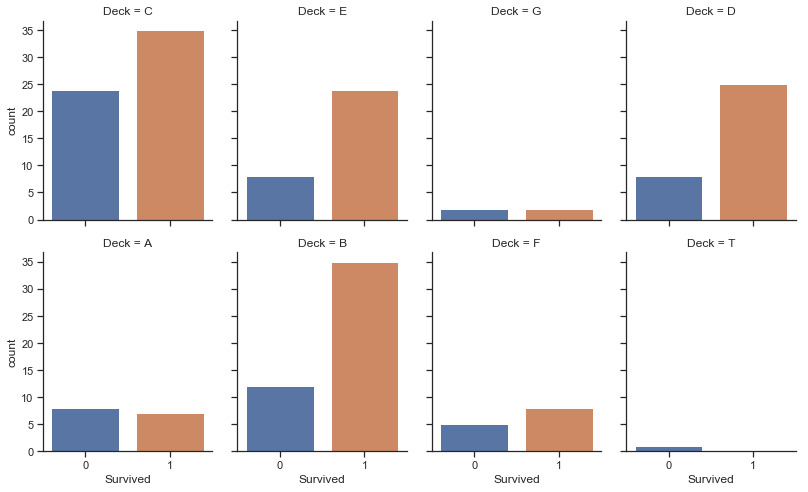

In [29]:
sns.factorplot("Survived", col="Deck", col_wrap=4, data=titanic_train_df[titanic_train_df['Deck'].notnull()],
               kind ='count', size=3.5, aspect=.8)

##### Where did the passengers come from? 

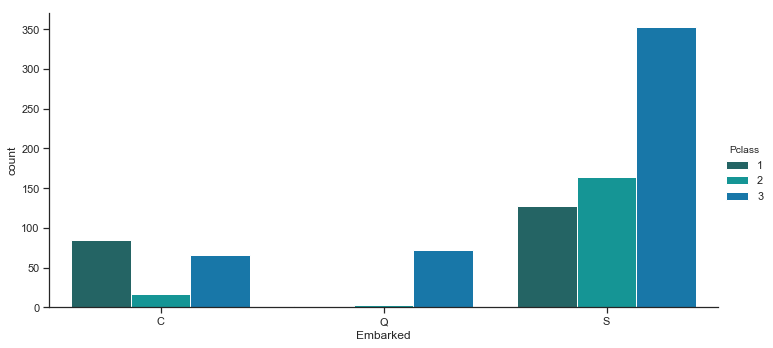

In [30]:
# Who from which class came from which city?
# Embark = port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
sns.factorplot('Embarked', data=titanic_train_df, kind='count', hue='Pclass', palette = 'winter_d',
               aspect=2, order = ['C','Q','S'])


##### What is the correlation between all the features like? 


Text(0.5, 1.0, 'Correlation between features')

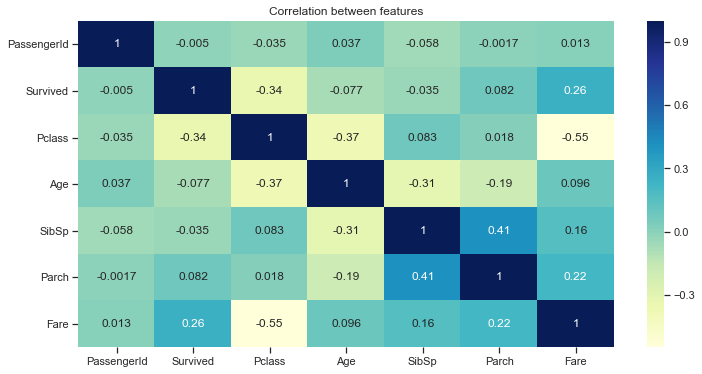

In [31]:
# Correlation between all features:
plt.figure(figsize = (12,6))
sns.heatmap(titanic_train_df.corr(),annot=True,cmap='YlGnBu',linecolor="white")

# Adding title to the heatmap:
plt.title('Correlation between features')

### Data Cleansing 

In [32]:
titanic_train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,NaN


In [33]:
# Assign output PassengerId-s to the following variable:
passengerId = titanic_test_df['PassengerId']

In [34]:
# Drop all the extra columns we created for data visualisation: 
titanic_train_df = titanic_train_df.drop(['Person', 'Deck'], axis = 1)


In [35]:
# Merge train and test data into titanic and drop passengerId column:
titanic = titanic_train_df.append(titanic_test_df, ignore_index = True)
titanic = titanic.drop('PassengerId', axis = 1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [36]:
# Creating indexes to separate data later:
titanic_train_df_idx = len(titanic_train_df)
titanic_test_df_idx = len(titanic) - len(titanic_test_df)

In [37]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


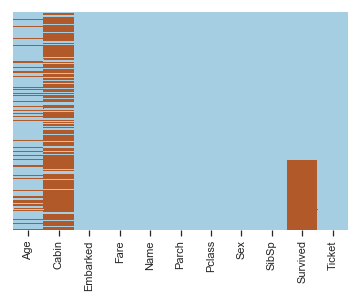

In [38]:
# Heatmap for visualising missing data:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = 'Paired') 

Looking at heatmap, we can see that some values, such as age and cabin are missing. We will try to estimate those missing values and add them to our dataset. 
There are some survived values missing, but we can ignore this for now, as those are the values we want to predict.

In [39]:
# We create new feature 'Title' there are 17 different titles used in names, so we map them to 6 main categories:
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [40]:
# Normalise the titles:
normalised_titles = {'Capt':'Officer','Col':'Officer','Major':'Officer', 'Jonkheer':'Royalty','Don':'Royalty',
                     'Sir':'Royalty', 'Dr':'Officer', 'Rev':'Officer', 'the Countess':'Royalty', 'Dona':'Royalty',
                     'Mme':'Mrs', 'Mlle':'Miss', 'Ms':'Mrs', 'Mr':'Mr', 'Mrs':'Mrs', 'Miss':'Miss', 'Master':'Master',
                     'Lady':'Royalty'}

In [41]:
# Map normalised titles to the current titles:
titanic['Title'] = titanic['Title'].map(normalised_titles)

In [42]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Mr


In [43]:
print(titanic['Title'].value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


There are 263 NaN values for passengers' age. We will estimate missing values, by using groupped data and averages.

In [44]:
# Group by Sex, Pclass and title:
group = titanic.groupby(['Sex', 'Pclass', 'Title'])

In [45]:
# To display mediang age by the groupped features:
group['Age'].median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

In [46]:
# Fill in the NaN age values by group median values:
titanic['Age'] = group['Age'].apply(lambda x: x.fillna(x.median()))

We will now fill in missing Embarked data with the most frequent value, Fare with median value and drop Cabin column.

In [47]:
# Fill in the NaN embarked values by the most frequent embarked:
most_embarked = titanic['Embarked'].value_counts().index[0]

titanic['Embarked'] = titanic['Embarked'].fillna(most_embarked)

In [48]:
# Fill NaN values for fare with median value:
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

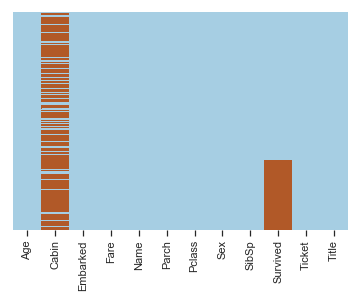

In [49]:
# Heatmap for visualising missing data:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = 'Paired') 

### Feature Engineering 

In [50]:
# Convert male and female groups to integer form:
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})

In [51]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,Mr


In [52]:
# Creating dummy variables for categorical features:
pclass_dummies = pd.get_dummies(titanic['Pclass'], prefix = 'Pclass')
title_dummies = pd.get_dummies(titanic['Title'], prefix = 'Title')
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix = 'Embarked')

In [53]:
# Concatenate dummy columns with main dataset:
titanic1 = pd.concat([titanic, pclass_dummies, title_dummies, embarked_dummies], axis = 1)

In [54]:
titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 24 columns):
Age              1309 non-null float64
Cabin            295 non-null object
Embarked         1309 non-null object
Fare             1309 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null int64
SibSp            1309 non-null int64
Survived         891 non-null float64
Ticket           1309 non-null object
Title            1309 non-null object
Pclass_1         1309 non-null uint8
Pclass_2         1309 non-null uint8
Pclass_3         1309 non-null uint8
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null ui

In [55]:
# Drop category fields:
titanic1 = titanic1.drop(['Title', 'Embarked', 'Name', 'Ticket', 'Cabin'], axis = 1)

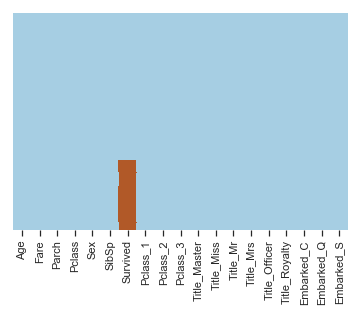

In [56]:
# Heatmap for visualising missing data:
sns.heatmap(titanic1.isnull(), yticklabels = False, cbar = False, cmap = 'Paired') 

## Random Forest Classifier 

In [57]:
# Creating training and testing data:
training = titanic1[ : titanic_train_df_idx]
testing = titanic1[titanic_test_df_idx : ]

In [58]:
# Convering Survived into integer:
training.Survived = training.Survived.astype(int)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


##### Training and Evaluating the Model

In [59]:
# Define input values, or X by dropping the Survived values:
X = training.drop(['Survived'], axis = 1)

# Define output values - this is the Survived feature:
y = training['Survived']

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
Age              891 non-null float64
Fare             891 non-null float64
Parch            891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null int64
SibSp            891 non-null int64
Pclass_1         891 non-null uint8
Pclass_2         891 non-null uint8
Pclass_3         891 non-null uint8
Title_Master     891 non-null uint8
Title_Miss       891 non-null uint8
Title_Mr         891 non-null uint8
Title_Mrs        891 non-null uint8
Title_Officer    891 non-null uint8
Title_Royalty    891 non-null uint8
Embarked_C       891 non-null uint8
Embarked_Q       891 non-null uint8
Embarked_S       891 non-null uint8
dtypes: float64(2), int64(4), uint8(12)
memory usage: 52.3 KB


###### Splitting the data into a training and testing set: 

In [61]:
# For splitting data we will be using train_test_split from sklearn:
from sklearn.model_selection import train_test_split

In [62]:
# Splitting the data into test and train, we are testing on 0.2 = 20% of dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

###### Training  

In [63]:
# Imports for training data:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forrest = RandomForestClassifier()

In [64]:
# Training the model:
forrest_params = dict(max_depth = [n for n in range(7,16)],
                      min_samples_split = [n for n in range(5,11)],
                      min_samples_leaf = [n for n in range(2,5)],
                      n_estimators = [n for n in range(10,60,10)],)

grid_forrest =  GridSearchCV(estimator = random_forrest, param_grid = forrest_params, cv = 2)

In [65]:
grid_forrest.fit(X,y)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_split': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [2, 3, 4], 'n_estimators': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

###### Evaluating the model 

In [66]:
y_predict = grid_forrest.predict(X)

In [67]:
y_predict

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y,y_predict)
cm

array([[516,  33],
       [ 85, 257]])

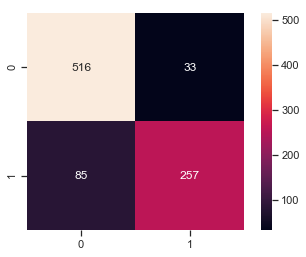

In [69]:
# Quick overview of our confusion matrix:
sns.heatmap(cm, annot = True, square = True, fmt='g')

In [70]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       549
           1       0.89      0.75      0.81       342

   micro avg       0.87      0.87      0.87       891
   macro avg       0.87      0.85      0.86       891
weighted avg       0.87      0.87      0.87       891



### Prediction for testing set

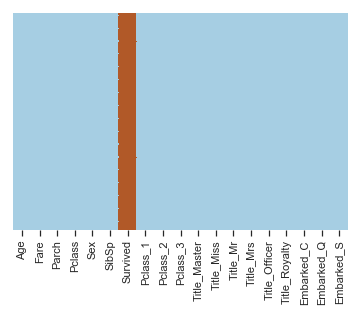

In [71]:
# Heatmap for visualising missing data:
sns.heatmap(testing.isnull(), yticklabels = False, cbar = False, cmap = 'Paired') 

In [72]:
testing = testing.drop(['Survived'], axis = 1)

In [73]:
prediction = grid_forrest.predict(testing)

In [74]:
# Combine ImageID and Label into one DataFrame:
final_result = pd.DataFrame({'Survived': prediction, 'PassengerId': passengerId})
final_result = final_result[['PassengerId', 'Survived']]

In [75]:
# Downloading final_result dataset as digit_output.csv:
final_result.to_csv('titanic_output.csv', index = False)

Titanic Kaggle score = 0.77511

## SVM model 

In [76]:
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [77]:
# Define input values, or X by dropping the Survived values:
X = training.drop(['Survived'], axis = 1)

# Define output values - this is the Survived feature:
y = training['Survived']

In [78]:
# Prepare training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1, stratify = y)

In [79]:
# Grid search to find best parameter values
param_grid = {'kernel': ['linear', 'rbf', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma' : [0.001, 0.01, 0.1, 1]}

In [80]:
grid_svc = GridSearchCV(svm.SVC(), param_grid, cv=10, scoring='accuracy')
grid_svc.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [81]:
print('Best score: {}'.format(grid_svc.best_score_))
print('Best parameters: {}'.format(grid_svc.best_params_))

Best score: 0.8249158249158249
Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}


In [88]:
# Model training
svc = svm.SVC(C = 10, gamma = 0.001, kernel = 'linear').fit(X_train, y_train)

In [89]:
# Test set score
testset_score = svc.score(X_test, y_test)
print('Accuracy with test set: {} (+/- {})'
      .format(round(testset_score.mean(),2), round(testset_score.std() * 2,2)))

Accuracy with test set: 0.83 (+/- 0.0)


In [90]:
# Prediction on test set
predict = svc.predict(testing)

In [91]:
# Combine ImageID and Label into one DataFrame:
result = pd.DataFrame({'Survived': predict, 'PassengerId': passengerId})
result = final_result[['PassengerId', 'Survived']]

In [92]:
# Downloading final_result dataset as digit_output.csv:
result.to_csv('svm_titanic_output.csv', index = False)

Titanic Kaggle score = 0.77511